In [1]:
from numpy import load
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from scipy import signal
import typing
#from typing import Callable, Tuple
from queue import PriorityQueue
from operator import itemgetter

In [2]:
data = load('data_ps1.npz')
data

NpzFile 'data_ps1.npz' with keys: environment, rod

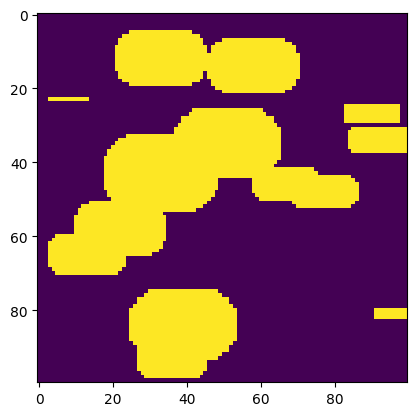

In [68]:
plt.imshow(c_list[0])

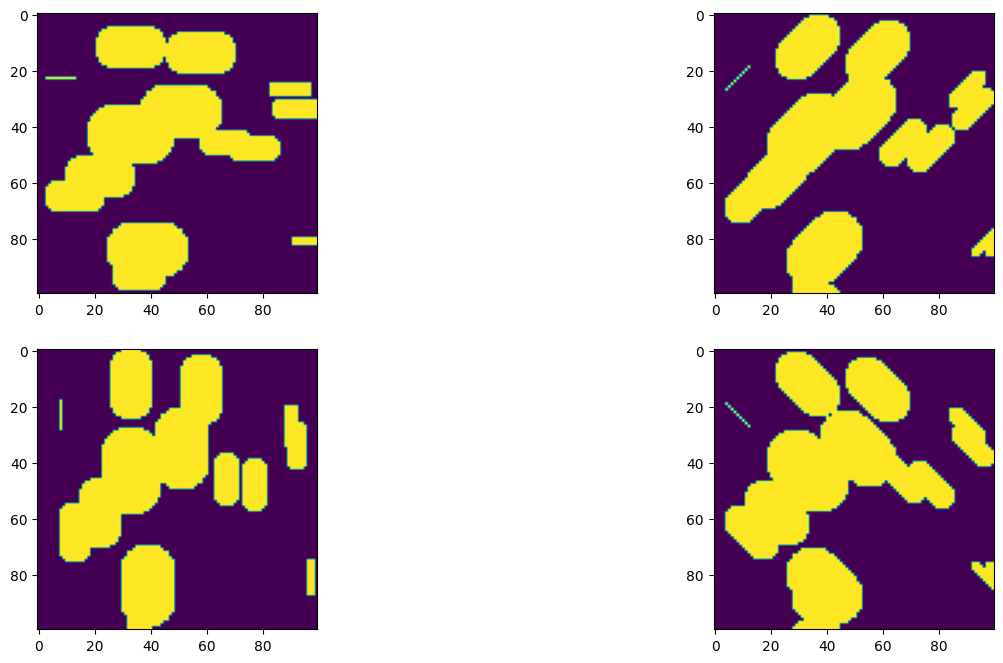

In [3]:
def normalize_image(img: np.ndarray, threshold: float = 0.1):
    """
    normalize the image to be between 0 and 1
    """
    dims = img.shape
    env = np.ones(dims)
    z = np.where(img < threshold)
    env[z] = 0.0
    return env

def c_space_plot(ax, env):
    ax.imshow(env)


c_list = []

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), layout=None)

for i in range(4):
    c_list.append(normalize_image(signal.convolve2d(data["environment"], data["rod"][:, :, i], boundary="symm", mode="same")))

k = 0
for ax in axs.flat:
    c_space_plot(ax, c_list[k])
    k += 1

In [56]:
c_list[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
'''
class Cell:
    
    def __init__(
        self,
        x_coordinate,
        y_coordinate,
        state,
    ):
        self.x = x_coordinate
        self.y = y_coordinate
        self.state = state
        self.visited = 0
        self.cost = 0
        self.queue = []
'''

In [19]:
'''
def set_neighbours(
    q,
) -> typing.List[typing.List[int]]:

    # SOMEHOW ADD ACTION (MOVE AND ROTATE) COST 
    neighbours = []
    if q.x > 6 and c_list[q.state][q.x-1, q.y] != 1:
            neighbours.append([q.x-1, q.y, q.state, q.cost+1])
    if q.x < 94 and c_list[q.state][q.x+1, q.y] != 1:
            neighbours.append([q.x+1, q.y, q.state, q.cost+1])
            q.cost += 1
    if q.y > 6 and c_list[q.state][q.x, q.y-1] != 1:
            neighbours.append([q.x, q.y-1, q.state, q.cost+1])
    if q.y < 94 and c_list[q.state][q.x, q.y+1] != 1:
            neighbours.append([q.x, q.y+1, q.state, q.cost+1])

    for j in [(q.state - 1) % 4, (q.state + 1) % 4]:
        if c_list[q.state][q.x, q.y] == 0:
            neighbours.append([q.x, q.y, q.state, q.cost+1])

    return neighbours
'''

In [54]:
'''
def A_star_algorithm(X_I: 'Cell',
                     X_G: 'Cell',
                    ):
    #Q = PriorityQueue()
    Q = [[X_I.cost, X_I]]
    X_I.visited = 1
    #PARENT TABLE

    #Q.put((0, X_I))
    
    while Q:
        #print(Q)
        q = min(Q, key=itemgetter(0))[1]
        #print(q)
        #q = [obj for obj in Q if obj.cost == min(Q, key = lambda x: x.cost).cost][0]
        #q = Q.get()[1]
        if q.x == X_G.x and q.y == X_G.y and q.state == X_G.state:
            return q.queue

        for i in set_neighbours(q):
            #print("i", i)
            #print(Q)
            c = Cell(i[0], i[1], i[2])
            c.cost = i[3] + q.cost
            if c.visited == 0:
                c.visited = 1
                c.queue += (q.queue)
                c.queue.append((q.x, q.y, q.state))
                #ADD HEURISTIC HERE: c.cost + HEURISTIC
                Q.append([c.cost, c])
            else:
                if q.cost > c.cost:
                    q.queue = c.queue
                    q.cost = c.cost

    return -1
'''

In [55]:
'''
X_I = Cell(6, 6, 2)
X_G = Cell(55, 55, 0)

result = A_star_algorithm(X_I, X_G)
result
'''

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[[0, <__main__.Cell object at 0x0000022355630E20>], [2, <__main__.Cell object at 0x00000223556321D0>], [3, <__main__.Cell object at 0x0000022355630AC0>], [3, <__main__.Cell object at 0x0000022355631810>], [3, <__main__.Cell object at 0x0000022355630610>], [4, <__main__.Cell object at 0x0000022355633AF0>], [5, <__main__.Cell object at 0x0000022355632110>], [5, <__main__.Cell object at 0x0000022355631570>], [5, <__main__.Cell object at 0x0000022355633B20>], [6, <__main__.Cell object at 0x0000022355630880>], [7, <__main__.Cell object at 0x0000022355630DC0>], [7, <__main__.Cell object at 0x0000022355632710>], [7, <__main__.Cell object at 0x0000022355630EB0>], [8, <__main__.Cell object at 0x0000022355630190>], [9, <__main__.Cell object at 0x0000022355630640>], [9, <__main__.Cell object at 0x0000022355630E80>], [9, <__main__.Cell object at 0x00000223556304C0>], [10, <__main__.Cell object at 0x0000022355630E50>], [11, <__main__.Cell object at 0x0000022355630B50>], [11, <__main__.Cell object a

KeyboardInterrupt: 

In [ ]:
'''
def A_star_algorithm(X_I,
                     X_G,
                    ):

    Q = {X_I: [0, 1]} # the first value is the cost, the second is visited or not
    costs = {X_I: 0} # for choosing the least one q
    queue = {X_I: 0}

    while Q:
        
        costs = dict(sorted(costs.items(), key=lambda item: item[1]))
        print("costs:", costs)
        q = min(costs, key=costs.get)
        q_cost = costs[q]
        #print(q)
        #print(Q)
        if q in Q:
            del Q[q]
     
        if q == X_G:
            return 9999

        for i in set_neighbours(q, costs[q]):
            c = (i[0], i[1], i[2])
            new_cost = q_cost + i[3]
            
            if c not in Q:
                #print(c)
                Q[c] = [0, 1] # mark as visited
                
                queue [c] = q
                Q[c] = [new_cost, 1] # cost determination
                costs[c] = new_cost #costs determination too
            else:
                
                if Q[c][0] > new_cost:
                    Q[c] = [new_cost, 1]
                    costs[c] = new_cost
                    queue.update({c: q})
            if q in costs:
                del costs[q]
            print(Q)
                    

    return -1
'''

In [103]:
def returning(X_I, X_G, dictionary):
    a = X_G
    b = 0
    s = [a]
    k = True
    while b != X_I:
        if k:
            b = a
            k = False
        b = dictionary[b][0]
        s.append(b)
    return s

In [104]:
def set_neighbours(
    q
) -> typing.List[typing.List[int]]:
    cost = 0
    neighbours = []
    if q[0] > 6 and c_list[q[2]][q[0]-1, q[1]] != 1:
            neighbours.append([q[0]-1, q[1], q[2], cost+1])
    if q[0] < 94 and c_list[q[2]][q[0]+1, q[1]] != 1:
            neighbours.append([q[0]+1, q[1], q[2], cost+1])
    if q[1] > 6 and c_list[q[2]][q[0], q[1]-1] != 1:
            neighbours.append([q[0], q[1]-1, q[2], cost+1])
    if q[1] < 94 and c_list[q[2]][q[0], q[1]+1] != 1:
            neighbours.append([q[0], q[1]+1, q[2], cost+1])

    for j in [(q[2] - 1) % 4, (q[2] + 1) % 4]:
        if c_list[j][q[0], q[1]] == 0:
            neighbours.append([q[0], q[1], j, cost+1])
    #print("neighbours:", neighbours)
    return neighbours

In [156]:
from queue import PriorityQueue
from typing import Callable, Tuple

def A_star_algorithm(startpos: Tuple,
                     goalp,
                    ):

    Q = PriorityQueue()  
    visited = np.zeros((100, 100, 4)) # 1 - visited, 0 - not visited 
    visited[startpos] = 1 
    queue = {startpos: (startpos, 0)} # state: (parent_state, C(state)) 
    states_visited = 0

    Q.put((0, startpos))
    
    while Q.qsize() != 0:
        q = Q.get()[1]
        print(q)
        
        if q == goalp:
            return returning((6,6,2), (55,55,0), queue), visited.sum()

        for i in set_neighbours(q):
            c = (i[0], i[1], i[2])
            new_cost = queue[q][1] + i[3]
           
            
            if visited[c] == 0:
                visited[c] = 1
                
                norm_val = np.subtract([q[0], q[1]], [c[0], c[1]])
                h = np.linalg.norm([X_G[0]-c[0], X_G[1]-c[1]], ord=1) + abs(q[2]-c[2])
                #h = 0
                
                queue[c] = (q, new_cost+h)
                Q.put((new_cost, c))

            else:
                if queue[c][1] > new_cost:
                    queue[c] = (q, new_cost)

    return -1

In [157]:
X_I = (6, 6, 2)
X_G = (55, 55, 0)

result, visited_sum = A_star_algorithm(X_I, X_G)
result.reverse()
result = tuple(result)
result

(6, 6, 2)
(6, 6, 1)
(6, 6, 3)
(6, 7, 2)
(7, 6, 2)
(6, 8, 2)
(7, 7, 2)
(8, 6, 2)
(7, 7, 1)
(7, 7, 3)
(8, 7, 2)
(6, 6, 0)
(6, 7, 1)
(6, 7, 3)
(7, 6, 1)
(7, 6, 3)
(6, 7, 0)
(6, 8, 0)
(7, 6, 0)
(8, 6, 0)
(6, 8, 1)
(6, 9, 1)
(6, 8, 3)
(6, 9, 3)
(6, 9, 2)
(7, 8, 2)
(8, 6, 1)
(9, 6, 1)
(8, 6, 3)
(9, 6, 3)
(8, 8, 2)
(8, 8, 1)
(8, 8, 3)
(8, 9, 2)
(9, 8, 2)
(8, 10, 2)
(9, 6, 2)
(9, 7, 2)
(9, 9, 2)
(10, 8, 2)
(6, 10, 1)
(6, 10, 3)
(7, 9, 1)
(7, 9, 3)
(9, 7, 1)
(9, 7, 3)
(9, 9, 1)
(9, 9, 3)
(10, 6, 1)
(10, 6, 3)
(10, 7, 2)
(10, 9, 2)
(6, 9, 0)
(6, 10, 2)
(7, 7, 0)
(7, 8, 0)
(7, 8, 1)
(7, 8, 3)
(7, 9, 2)
(8, 7, 0)
(8, 7, 1)
(8, 7, 3)
(8, 8, 0)
(8, 9, 0)
(9, 8, 0)
(8, 9, 1)
(8, 9, 3)
(8, 10, 0)
(9, 6, 0)
(9, 7, 0)
(10, 7, 0)
(9, 8, 1)
(9, 8, 3)
(10, 6, 2)
(10, 7, 1)
(10, 7, 3)
(10, 8, 0)
(11, 7, 0)
(10, 9, 0)
(11, 7, 1)
(11, 7, 3)
(11, 8, 0)
(7, 10, 2)
(7, 11, 2)
(7, 11, 1)
(7, 11, 3)
(7, 12, 2)
(6, 12, 2)
(7, 13, 2)
(8, 12, 2)
(8, 10, 1)
(8, 10, 3)
(8, 11, 2)
(9, 11, 2)
(9, 11, 1)
(9, 11, 3)
(10, 1

((6, 6, 2),
 (7, 6, 2),
 (7, 7, 2),
 (7, 8, 2),
 (7, 9, 2),
 (7, 10, 2),
 (7, 11, 2),
 (8, 11, 2),
 (8, 11, 1),
 (8, 12, 1),
 (9, 12, 1),
 (9, 13, 1),
 (9, 14, 1),
 (9, 15, 1),
 (9, 16, 1),
 (10, 16, 1),
 (11, 16, 1),
 (12, 16, 1),
 (13, 16, 1),
 (14, 16, 1),
 (14, 17, 1),
 (14, 18, 1),
 (15, 18, 1),
 (15, 19, 1),
 (14, 19, 1),
 (14, 19, 2),
 (14, 20, 2),
 (14, 21, 2),
 (15, 21, 2),
 (16, 21, 2),
 (16, 22, 2),
 (16, 23, 2),
 (17, 23, 2),
 (18, 23, 2),
 (18, 24, 2),
 (19, 24, 2),
 (19, 24, 3),
 (20, 24, 3),
 (21, 24, 3),
 (21, 25, 3),
 (21, 26, 3),
 (21, 27, 3),
 (21, 28, 3),
 (21, 29, 3),
 (22, 29, 3),
 (22, 29, 0),
 (22, 30, 0),
 (22, 31, 0),
 (22, 32, 0),
 (22, 33, 0),
 (22, 34, 0),
 (23, 34, 0),
 (23, 35, 0),
 (23, 36, 0),
 (23, 37, 0),
 (23, 38, 0),
 (23, 39, 0),
 (23, 40, 0),
 (22, 40, 0),
 (21, 40, 0),
 (21, 41, 0),
 (21, 42, 0),
 (22, 42, 0),
 (22, 43, 0),
 (22, 43, 1),
 (22, 44, 1),
 (22, 45, 1),
 (22, 46, 1),
 (22, 46, 0),
 (23, 46, 0),
 (23, 47, 0),
 (23, 48, 0),
 (23, 49, 0)

In [158]:
len(result)

145

In [159]:
visited_sum

7528.0

MovieWriter ffmpeg unavailable; using Pillow instead.


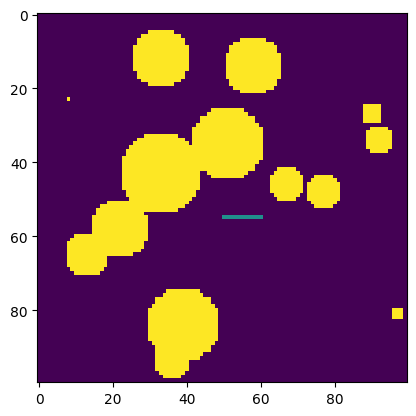

In [160]:
def plot_enviroment(img: np.ndarray, obj: np.ndarray, state: tuple):
    """
    @param img: original image in 2d
    @param obj: is the 3d array of different configurations
    @param state: is the current pose (x, y, orientation) of the object

    @return: the merged image
    """
    dims = obj.shape
    dim_x = int((dims[0] - 1) / 2)
    dim_y = int((dims[1] - 1) / 2)
    merged_img = np.copy(img)
    merged_img[state[0] - dim_x:state[0] + dim_x + 1, state[1] - dim_y:state[1] + dim_y + 1] += obj[:, :, state[2]] * 0.5
    return merged_img

def plotting_results(environment: np.ndarray, rod: np.ndarray, plan: list, save_path: str = 'rod_solve.gif'):
    """
    create an animation of the plan and save it to a file

    @param environment: the environment image in 2d
    @param rod: is the 3d array of different configuration
    @param plan: list of poses
    @param save_path: path to save the animation
    """

    fig = plt.figure()
    imgs = []

    for s in plan:
        im = plot_enviroment(environment, rod, s)
        plot = plt.imshow(im)
        imgs.append([plot])

    ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True)

    ani.save(save_path)

    plt.show()
    
plotting_results(data["environment"], data["rod"], result)

In [114]:
def enqueue(p,
            config,
            cost,
           ):
    p.append((config, cost))
    return sorted(p, key=lambda tup: tup[1], reverse=True)

def dequeue(p
):
    if not p:
        return None
    return p.pop()[0]

In [115]:
Q = []
Q = enqueue(Q, (6,6,2), 0)
#Q = enqueue(Q, (3,3,2), 1)
#Q = enqueue(Q, (7,8,9), 2)

In [116]:
Q

[((6, 6, 2), 0)]

In [117]:
q = dequeue(Q)
q

(6, 6, 2)

In [118]:
Q

[]

In [119]:
Q = enqueue(Q, (3,3,2), 1)
Q

[((3, 3, 2), 1)]